In [117]:
import numpy as np
import matplotlib.pyplot as plt

### sample

3 layers, number of units: 3, 3, 1

In [2]:
L = 3
S = np.array([3,3,1])
K = 1

In [3]:
def h(x):
    return 1/(1+np.exp(-x))
def J(hx,y):
    return -(y*np.log(hx)+(1-y)*np.log(1-hx))
    

In [4]:
np.random.seed(10)
inp = np.random.randn(30).reshape(10,3)
np.random.seed(20)
outp = (np.random.randn(10)>0).astype(int)
inp,outp

(array([[ 1.3315865 ,  0.71527897, -1.54540029],
        [-0.00838385,  0.62133597, -0.72008556],
        [ 0.26551159,  0.10854853,  0.00429143],
        [-0.17460021,  0.43302619,  1.20303737],
        [-0.96506567,  1.02827408,  0.22863013],
        [ 0.44513761, -1.13660221,  0.13513688],
        [ 1.484537  , -1.07980489, -1.97772828],
        [-1.7433723 ,  0.26607016,  2.38496733],
        [ 1.12369125,  1.67262221,  0.09914922],
        [ 1.39799638, -0.27124799,  0.61320418]]),
 array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1]))

In [5]:
x = inp[0]
y = outp[0]
x,y

(array([ 1.3315865 ,  0.71527897, -1.54540029]), 1)

In [6]:
def add_bias(arr):
    return np.hstack([[0.1],arr])

In [7]:
# a2 = h(np.dot(theta1,np.hstack([[1],a1])))
# a3 = h(np.dot(theta2,np.hstack([[1],a2]))); a3

In [8]:
S

array([3, 3, 1])

In [9]:
theta=[]
for i in range(L-1):
    np.random.seed(i)
    theta_temp = np.random.rand(S[i+1],S[i]+1) # plus 1 for bias
    theta.append(theta_temp)
theta

[array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
        [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
        [0.96366276, 0.38344152, 0.79172504, 0.52889492]]),
 array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01]])]

In [10]:
a = []
a.append(add_bias(x)),a

(None, [array([ 0.1       ,  1.3315865 ,  0.71527897, -1.54540029])])

In [11]:
a = []
a.append(add_bias(x))
for i in range(L-1):
    a_temp = h(np.dot(theta[i],a[i]))
    if i==L-2:
        a.append(a_temp)
    else:
        a.append(add_bias(a_temp))
a

[array([ 0.1       ,  1.3315865 ,  0.71527897, -1.54540029]),
 array([0.1       , 0.64480917, 0.45940953, 0.588048  ]),
 array([0.66463369])]

In [12]:
delta = []
delta.append(a[-1]-y)
for i in range(L-2):
    delta.append(theta[-1-i].T.dot(delta[-1])*a[-2-i]*(1-a[-2-i]))
delta.reverse()
delta

[array([-1.25869618e-02, -5.53274391e-02, -9.52616792e-06, -2.45620022e-02]),
 array([-0.33536631])]

In [13]:
a[-2-i]*(1-a[-2-i])

array([0.09      , 0.22903031, 0.24835241, 0.24224755])

In [14]:
D=[]
for i in range(L-1):
    if i==0:
        D.append(np.matmul(delta[-1-i].reshape(len(delta[-1-i]),1), a[-2-i].reshape(1,len(a[-2-i]))))
    else:
        D.append(np.matmul(delta[-1-i].reshape(len(delta[-1-i]),1)[1:], a[-2-i].reshape(1,len(a[-2-i]))))
D.reverse()
D

[array([[-5.53274391e-03, -7.36732712e-02, -3.95745539e-02,
          8.55030405e-02],
        [-9.52616792e-07, -1.26849166e-05, -6.81386762e-06,
          1.47217427e-05],
        [-2.45620022e-03, -3.27064307e-02, -1.75686838e-02,
          3.79581254e-02]]),
 array([[-0.03353663, -0.21624727, -0.15407048, -0.19721149]])]

#### gradient check

calculate derivative directly and compare with D,
check whether the derivative result is right.

In [15]:
theta

[array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
        [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
        [0.96366276, 0.38344152, 0.79172504, 0.52889492]]),
 array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01]])]

In [16]:
a1=a[0]; a1

array([ 0.1       ,  1.3315865 ,  0.71527897, -1.54540029])

In [17]:
def temp(theta_plus,theta_minus):
    a2_plus = h(np.dot(theta_plus,a1))
    a3_plus = h(np.dot(theta_minus,add_bias(a2_plus)))
    return a3_plus

In [18]:
theta_temp = np.vstack([theta[0],theta[1]]).flatten()
l=[]
for i in range(16):
    theta_plus = theta_temp.copy()
    theta_plus[i] += 0.001
    theta_minus = theta_temp.copy()
    theta_minus[i] -= 0.001
    theta_plus = theta_plus.reshape(4,4)
    theta_minus = theta_minus.reshape(4,4)
    a3_plus = temp(theta_plus[:3],theta_plus[-1])
    a3_minus = temp(theta_minus[:3],theta_minus[-1])
    l.append((J(a3_plus,y)-J(a3_minus,y))/0.002)

In [19]:
np.array(l).reshape(4,4)

array([[-5.53274391e-03, -7.36732653e-02, -3.95745530e-02,
         8.55030313e-02],
       [-9.52616874e-07, -1.26849149e-05, -6.81386736e-06,
         1.47217398e-05],
       [-2.45620022e-03, -3.27064266e-02, -1.75686831e-02,
         3.79581190e-02],
       [-3.35366311e-02, -2.16247274e-01, -1.54070481e-01,
        -1.97211491e-01]])

### NW

In [20]:
L = 3
S = np.array([3,3,1])
K = 1

In [47]:
def h(x):
    '''sigmoid function'''
    return 1/(1+np.exp(-x))
def add_bias(arr):
    '''add constant bias, for each layer except the outcome layer'''
    return np.hstack([[0.1],arr])

def forward(x,theta):
    '''forward propagation to calculate values of each layer.
    the last element in a is the outcome layer'''
    a = []
    a.append(add_bias(x))
    for i in range(L-1):
        a_temp = h(np.dot(theta[i],a[i]))
        if i==L-2:
            a.append(a_temp)
        else:
            a.append(add_bias(a_temp))
    return a

def backward(a,y):
    '''backward propagation to calculate derivative of cost funtion. 
    derivative is for gradient descent to optimize model wights, i.e. theta'''
    delta = []
    delta.append(a[-1]-y)
    for i in range(L-2):
        delta.append(theta[-1-i].T.dot(delta[-1])*a[-2-i]*(1-a[-2-i]))
    delta.reverse()
    '''delta is a temp value for calculating derivative'''
    
    D=[]
    for i in range(L-1):
        if i==0:
            D.append(np.matmul(delta[-1-i].reshape(len(delta[-1-i]),1), a[-2-i].reshape(1,len(a[-2-i]))))
        else:
            D.append(np.matmul(delta[-1-i].reshape(len(delta[-1-i]),1)[1:], a[-2-i].reshape(1,len(a[-2-i]))))
    D.reverse()
    return D

def update(D):
    '''gradient descent to update theta.
    currently constant learning rate'''
    global theta
    for i in range(len(D)):
        theta[i]-=0.1*D[i] # 0.01 is the learning rate
    

in sample training

In [48]:
'''in sample input and out put'''
# np.random.seed(10)
# inp = np.random.randn(30).reshape(10,3)
# np.random.seed(20)
# outp = (np.random.randn(10)>0).astype(int)

inp = (np.random.randn(30).reshape(10,3)>0).astype(int)
outp = (inp.sum(axis=1)<2).astype(int)
inp,outp

(array([[1, 1, 1],
        [0, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 1],
        [1, 1, 0],
        [0, 1, 1],
        [0, 1, 0],
        [1, 0, 1],
        [0, 0, 1]]), array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1]))

In [49]:
'''randomly initalize theta'''
theta=[]
for i in range(L-1):
    np.random.seed(i)
    theta_temp = np.random.rand(S[i+1],S[i]+1) # plus 1 for bias
    theta.append(theta_temp)
theta

[array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
        [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
        [0.96366276, 0.38344152, 0.79172504, 0.52889492]]),
 array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01]])]

In [50]:
ite = 0
MAX_ITER = 150000
while(ite<MAX_ITER):
    '''calculate derivative of cost funtion'''
    D_all = list(map(lambda x:0*x,theta))
    for i in range(len(inp)):
        x = inp[i]
        y = outp[i]
        a = forward(x,theta)
        D = backward(a,y)
        for i in range(len(D_all)):
            D_all[i]+=D[i]

    '''break out when all the derivatives are smaller than 0.001'''
    max_temp = max(list(map(np.max,map(abs,D_all))))
    if max_temp<0.001:
        break
    
    update(D_all)
    ite+=1

In [51]:
ite

21194

In [52]:
# final theta
theta

[array([[13.32307833, -1.65842867, -1.63999052, -1.4742822 ],
        [-5.69800024,  0.87287011,  1.13439865,  2.11857353],
        [ 8.83641272, -1.74614837, -1.36187605, -1.12989652]]),
 array([[  1.3961261 ,  22.69634365, -13.98647382,  17.37254937]])]

In [53]:
# final derivative
D

[array([[-0.00064686,  0.        ,  0.        , -0.00646855],
        [ 0.00023164,  0.        ,  0.        ,  0.0023164 ],
        [-0.00049016,  0.        ,  0.        , -0.00490156]]),
 array([[-0.00011458, -0.00053229, -0.00094496, -0.0005027 ]])]

In [54]:
fit = np.zeros(len(inp))
for i in range(len(inp)):
    x = inp[i]
    a = forward(x,theta)
    fit[i]=a[-1]

In [55]:
(fit>0.5).astype(int)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

In [56]:
outp

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

out of sample

In [63]:
inp_out_sample = (np.random.randn(3000).reshape(1000,3)>0).astype(int)
outp_out_sample = (inp_out_sample.sum(axis=1)<2).astype(int)
fit_pred = np.zeros(len(inp_out_sample))
for i in range(len(inp_out_sample)):
    x = inp_out_sample[i]
    a = forward(x,theta)
    fit_pred[i]=a[-1]

In [65]:
pred = (fit_pred>0.5).astype(int)

In [68]:
(pred == outp_out_sample).sum()

1000

### NW, with regularization

In [20]:
L = 3
S = np.array([3,3,1])
K = 1

In [80]:
def h(x):
    '''sigmoid function'''
    return 1/(1+np.exp(-x))
def add_bias(arr):
    '''add constant bias, for each layer except the outcome layer'''
    return np.hstack([[0.1],arr])

def forward(x,theta):
    '''forward propagation to calculate values of each layer.
    the last element in a is the outcome layer'''
    a = []
    a.append(add_bias(x))
    for i in range(L-1):
        a_temp = h(np.dot(theta[i],a[i]))
        if i==L-2:
            a.append(a_temp)
        else:
            a.append(add_bias(a_temp))
    return a

def backward(a,y,lam):
    '''backward propagation to calculate derivative of cost funtion. 
    derivative is for gradient descent to optimize model wights, i.e. theta'''
    delta = []
    delta.append(a[-1]-y)
    for i in range(L-2):
        delta.append(theta[-1-i].T.dot(delta[-1])*a[-2-i]*(1-a[-2-i]))
    delta.reverse()
    '''delta is a temp value for calculating derivative'''
    
    D=[]
    for i in range(L-1):
        if i==0:
            D.append(np.matmul(delta[-1-i].reshape(len(delta[-1-i]),1), a[-2-i].reshape(1,len(a[-2-i]))))
        else:
            D.append(np.matmul(delta[-1-i].reshape(len(delta[-1-i]),1)[1:], a[-2-i].reshape(1,len(a[-2-i]))))
    D.reverse()
    
    '''regularization term'''
    for i in range(len(theta)):
        theta_temp = theta[i].copy()*lam
        theta_temp[:,0]=0
        D[i]+=theta_temp
    
    return D

def update(D):
    '''gradient descent to update theta.
    currently constant learning rate'''
    global theta
    for i in range(len(D)):
        theta[i]-=0.1*D[i] # 0.01 is the learning rate
    

in sample training

In [81]:
'''in sample input and out put'''
# np.random.seed(10)
# inp = np.random.randn(30).reshape(10,3)
# np.random.seed(20)
# outp = (np.random.randn(10)>0).astype(int)

inp = (np.random.randn(30).reshape(10,3)>0).astype(int)
outp = (inp.sum(axis=1)<2).astype(int)
inp,outp

(array([[1, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 1],
        [1, 0, 0],
        [0, 0, 0],
        [1, 1, 0],
        [0, 0, 1],
        [1, 1, 1],
        [0, 1, 0]]), array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1]))

In [82]:
'''randomly initalize theta'''
theta=[]
for i in range(L-1):
    np.random.seed(i)
    theta_temp = np.random.rand(S[i+1],S[i]+1) # plus 1 for bias
    theta.append(theta_temp)
theta

[array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
        [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
        [0.96366276, 0.38344152, 0.79172504, 0.52889492]]),
 array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01]])]

In [104]:
ite = 0
MAX_ITER = 150000
while(ite<MAX_ITER):
    '''calculate derivative of cost funtion'''
    D_all = list(map(lambda x:0*x,theta))
    for i in range(len(inp)):
        x = inp[i]
        y = outp[i]
        a = forward(x,theta)
        D = backward(a,y,0.0)
        for i in range(len(D_all)):
            D_all[i]+=D[i]

    '''break out when all the derivatives are smaller than 0.001'''
    max_temp = max(list(map(np.max,map(abs,D_all))))
    if max_temp<0.001:
        break
    
    update(D_all)
    ite+=1

In [105]:
ite

15375

In [106]:
# final theta
theta

[array([[ 23.40828646,  -2.08305192,  -1.98421757,  -2.09105432],
        [ 23.37488247,  -2.08136745,  -1.98221121,  -2.08915357],
        [-26.2350643 ,   2.23466327,   2.14856778,   2.24780506]]),
 array([[ -8.1484553 ,  11.45318242,  11.44205017, -11.27582841]])]

In [107]:
# final derivative
D

[array([[-6.72110697e-05,  0.00000000e+00, -6.72110697e-04,
          0.00000000e+00],
        [-6.71615195e-05,  0.00000000e+00, -6.71615195e-04,
          0.00000000e+00],
        [ 6.45853748e-05,  0.00000000e+00,  6.45853748e-04,
          0.00000000e+00]]),
 array([[-2.42275522e-05, -1.42511265e-04, -1.42432970e-04,
         -9.29000643e-05]])]

In [108]:
fit = np.zeros(len(inp))
for i in range(len(inp)):
    x = inp[i]
    a = forward(x,theta)
    fit[i]=a[-1]

In [109]:
(fit>0.5).astype(int)

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [110]:
outp

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1])

out of sample

In [112]:
inp_out_sample = (np.random.randn(3000).reshape(1000,3)>0).astype(int)
outp_out_sample = (inp_out_sample.sum(axis=1)<2).astype(int)
fit_pred = np.zeros(len(inp_out_sample))
for i in range(len(inp_out_sample)):
    x = inp_out_sample[i]
    a = forward(x,theta)
    fit_pred[i]=a[-1]

In [113]:
pred = (fit_pred>0.5).astype(int)

In [114]:
(pred == outp_out_sample).sum()

1000

(array([514.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 486.]),
 array([1.12364005e-05, 2.50109554e-02, 5.00106744e-02, 7.50103934e-02,
        1.00010112e-01, 1.25009831e-01, 1.50009550e-01, 1.75009269e-01,
        2.00008988e-01, 2.25008707e-01, 2.50008426e-01, 2.75008145e-01,
        3.00007864e-01, 3.25007583e-01, 3.50007302e-01, 3.75007021e-01,
        4.00006740e-01, 4.25006459e-01, 4.50006178e-01, 4.75005897e-01,
        5.00005616e-01, 5.25005335e-01, 5.50005054e-01, 5.75004773e-01,
        6.00004492e-01, 6.25004211e-01, 6.50003930e-01, 6.75003649e-01,
        7.00003368e-01, 7.25003087e-01, 7.50002806e-01, 7.75002525e-01,
        8.00002244e-01, 8.25001963e-01, 8.50001682e-01, 8.75001401e-01,
        9.00001120e-01, 9.25000839e-01, 9.50000558e-01, 9.75000277e-01,
      

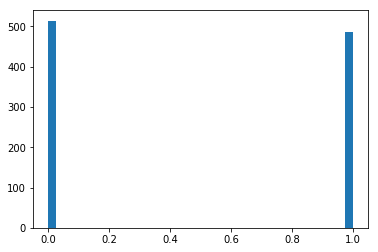

In [119]:
plt.hist(fit_pred,bins=40)